In [1]:
import os

%load_ext autoreload
%autoreload 2

In [2]:
os.chdir('$araCNA_dir')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from aracna.src.analysis.plot_comparison import apply_montserrat
from aracna.src.datamodules.simulated.main_cna_sampling_func import sample_cnas_from_parental

ibm_palette = [
    '#648fff',
    '#785ef0',
    '#dc267f',
    '#fe6100',
    '#ffb000',
]

tol_palette =  ['#CC6677', '#332288', '#DDCC77', '#117733', '#88CCEE', '#882255', '#44AA99', '#999933', '#AA4499', '#DDDDDD']

ascat_c = tol_palette[0]
battenberg_c = tol_palette[5]
hmm_copy_c = tol_palette[3]

hyena_c = tol_palette[2]
mamba_c = tol_palette[4]
# aracna_c = tol_palette[4]
cnv_c = tol_palette[7]

model_palette = [hmm_copy_c, ascat_c, battenberg_c, cnv_c, mamba_c, hyena_c]

In [84]:
sns.color_palette(model_palette)

[(0.06666666666666667, 0.4666666666666667, 0.2),
 (0.8, 0.4, 0.4666666666666667),
 (0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.6, 0.6, 0.2),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8666666666666667, 0.8, 0.4666666666666667)]

In [78]:
sns.color_palette(tol_palette)

[(0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.8666666666666667, 0.8, 0.4666666666666667),
 (0.06666666666666667, 0.4666666666666667, 0.2),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.6, 0.6, 0.2),
 (0.6666666666666666, 0.26666666666666666, 0.6),
 (0.8666666666666667, 0.8666666666666667, 0.8666666666666667)]

In [4]:

best_hyena="pjflljt4"
best_mamba = "qwsvrrgk"
# model_key=best_mamba

model_dict = {best_hyena: "araCNA-hyena", best_mamba: "araCNA-mamba"}
reverse_dict = {"araCNA-hyena": best_hyena, "araCNA-mamba": best_mamba}
model_keys = sorted([best_hyena, best_mamba])

model_str = "_".join(model_keys)
aracna_mod="win_opt_500"
# figure_prefix="" if model_key == best_mamba else "hyena_"
figure_prefix="w_hyena"


### Simulated

In [5]:
from aracna.src.analysis.get_simmed_metrics import (
    write_simmed_output,
    write_simmed_output_from_file,
)

write_simmed_output("$data_dir/aracna_sim/", model_keys[0], num_samples=100)

Using Normal Backbone


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
$work_dir/miniconda3/envs/py312/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
$work_dir/miniconda3/envs/py312/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` 

In [ ]:
write_simmed_output_from_file("$data_dir/aracna_sim/", model_keys[0])

In [8]:
write_simmed_output_from_file("$data_dir/aracna_sim/", model_keys[1])

Using MambaBackbone


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
$work_dir/miniconda3/envs/py312/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
LOCAL_RANK: 0 - CUDA

In [8]:

import json


def get_df_filename(model_key):
    filename= f"$data_dir/aracna_sim/{model_key}_summary_output.json"

    with open(filename) as f:
        data = json.load(f)

    df = pd.json_normalize({i: data_el for i, data_el in enumerate(data)}, sep=".").melt(var_name='metric_path', value_name='metric_val')

    df[['sample_id', 'metric_name', 'metric_type']] = df['metric_path'].str.split('.', expand=True)

    df['model'] = model_dict[model_key]

    return df

df_ls = [get_df_filename(model_key) for model_key in model_keys]

df = pd.concat(df_ls)

aracna_order = ["araCNA-mamba", "araCNA-hyena"]
df['model'] = pd.Categorical(df['model'], categories=aracna_order, ordered=True)
# Sort by category
df = df.sort_values('model').reset_index()

In [ ]:
df.model.unique()

/tmp/slurm-19515044/ipykernel_3457312/3457421658.py:4: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  g = sns.catplot(df[df.metric_name.isin(['concordance', 'rmse'])], x='model', y="metric_val", col="metric_name", sharey=False, kind='box', hue='metric_type', palette=ibm_palette, height=3, aspect=1.2, col_wrap=1, hue_order=['major', 'minor', 'both', 'total'], showcaps=False)


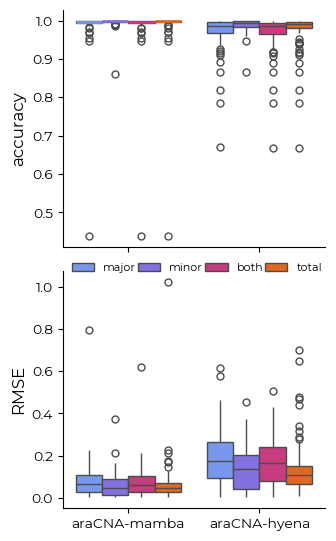

In [265]:

@apply_montserrat
def get_concordance_plots(df):
    # g = sns.catplot(df[df.metric_name.isin(['concordance', 'rmse'])], y="metric_val", col="metric_name", sharey=False, kind='bar', hue='metric_type', palette=ibm_palette, height=3, aspect=1.2, col_wrap=1, hue_order=['major', 'minor', 'both', 'total'])
    g = sns.catplot(df[df.metric_name.isin(['concordance', 'rmse'])], x='model', y="metric_val", col="metric_name", sharey=False, kind='box', hue='metric_type', palette=ibm_palette, height=3, aspect=1.2, col_wrap=1, hue_order=['major', 'minor', 'both', 'total'], showcaps=False)
    # Remove titles
    g.set_titles("")
    # Add y-labels to each subplot
    axes = g.axes.flat
    axes[0].set_ylabel("accuracy")
    axes[0].set_xlabel("")
    axes[1].set_ylabel("RMSE")
    axes[1].set_xlabel("")
    # axes[0].set_xticks([])
    # axes[1].set_xticks([])
    sns.move_legend(g, loc='upper center', bbox_to_anchor=(0.48, 0.53), ncol=4, title='', fontsize=8, columnspacing=0.2)

    box = axes[0]
    # Iterate through each median line and set the color based on the hue
    for i, container in enumerate(box.containers):
        if i <= 3:
            hue_color = container.boxes[0].get_facecolor() # Get the facecolor of the current box which corresponds to hue
            container.medians[0].set_color(hue_color)  # Median line index in each boxplot group
            container.medians[0].set_linewidth(2)  # Adjust thickness as desired
    g.fig.subplots_adjust(hspace=0.1)


get_concordance_plots(df)
plt.savefig(f"data/figures/{figure_prefix}sim_conc.png", dpi=300, bbox_inches='tight')

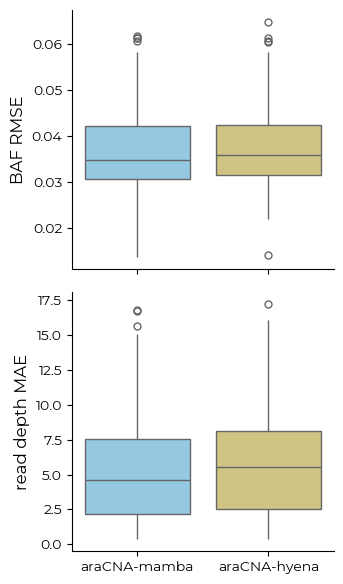

In [266]:
@apply_montserrat
def get_recon_plot(df):
    df['_metric_name'] = pd.Categorical(df['metric_name'], categories=['baf_rmse', 'rd_mae'], ordered=True)

    g = sns.catplot(df[df.metric_name.isin(['baf_rmse', 'rd_mae'])], x='model', y="metric_val", col="_metric_name", sharey=False, kind='box', hue='model', palette=[mamba_c, hyena_c], height=3, aspect=1.2, col_wrap=1, hue_order=aracna_order, showcaps=False)

    # sns.catplot(plot_df, x="model_1", y="metric_val", col="metric_name", sharey=False, kind='box', hue='model_1', palette=plot_palette, hue_order=renamed_models, showcaps=False, sharex=False, col_wrap=3, height=4)
    # Remove titles
    g.set_titles("")
    g.set_xlabels('')
    g.axes.flat[0].set_ylabel("BAF RMSE")
    # g.axes.flat[0].set_xticks([])
    g.axes.flat[1].set_ylabel("read depth MAE")
    # g.axes.flat[0].set_xticks([])
    # Display the plots
    sns.despine()
    plt.tight_layout()
    plt.savefig(f"data/figures/{figure_prefix}sim_recon.png", dpi=300)


get_recon_plot(df)

In [166]:
# Function to add y=x line to each facet
def add_identity_line(*args, **kwargs):
    ax = plt.gca()  # Get current axis
    limits = [min(ax.get_xlim()[0], ax.get_ylim()[0]),
              max(ax.get_xlim()[1], ax.get_ylim()[1])]
    ax.plot(limits, limits, '--', color='gray', linewidth=0.5)
    ax.set_xlim(limits)
    ax.set_ylim(limits)

In [268]:
df_pivot = df[df.metric_name.isin(['ploidy', 'purity'])].reset_index().pivot(index=['sample_id', 'metric_name'], columns=['model', 'metric_type'], values='metric_val').reset_index()

df_pivot.columns = df_pivot.columns.map(lambda x: (f'{x[0]}' if 'predicted' in x[1] else x[1] if x[1] == 'real' else x[0], x[1]))  # Renaming values in level 0
df_pivot.columns = df_pivot.columns.droplevel(1)
df_pivot = df_pivot.loc[:, ~df_pivot.columns.duplicated()]


In [269]:
purity_plot = df_pivot.reset_index().melt(id_vars=['sample_id', 'metric_name', 'real'], value_name='metric_val', value_vars=['araCNA-mamba', 'araCNA-hyena'])


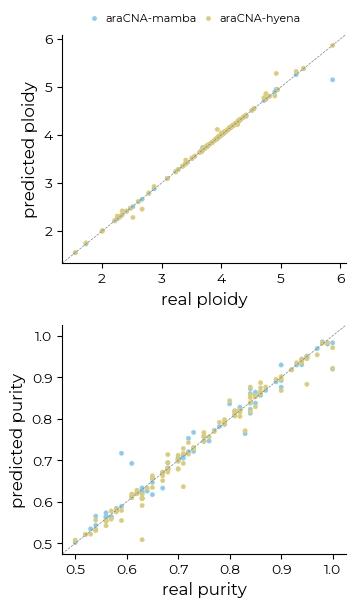

In [274]:
g = sns.FacetGrid(purity_plot, row="metric_name", sharey=False, sharex=False, height=3, aspect=0.6)
g.map_dataframe(sns.scatterplot, x="real", y="metric_val", hue="model", palette=[mamba_c, hyena_c], s=10, hue_order=aracna_order, edgecolor=None)
g.add_legend()
# g.set_axis_labels("ascat", "other model")

g.set_titles("")
# IF VERTICAL
sns.move_legend(g, loc='upper center', bbox_to_anchor=(0.53, 1.02), ncol=4, title='', fontsize=8, columnspacing=0.01, handletextpad=0.01,
)
# IF HORIZONTAL
# sns.move_legend(g, loc='upper center', bbox_to_anchor=(0.51, 1.02), ncol=4, title='', fontsize=8, columnspacing=0.01, handletextpad=0.01,
# )
g.axes.flat[0].set_xlabel("real ploidy")
g.axes.flat[0].set_ylabel("predicted ploidy")

g.axes.flat[1].set_xlabel("real purity")
g.axes.flat[1].set_ylabel("predicted purity")

# Apply the function to each facet
g.map(add_identity_line)
plt.tight_layout()
plt.savefig(f"data/figures/{figure_prefix}sim_purity.png", dpi=300, bbox_inches='tight')


In [ ]:
# task = SeqInfo(max_seq_length=int(6.5e5))

# read_depth = 15
# purity = 1

# read_depth_range = [read_depth, read_depth]
# purity_range = [purity, purity]

# read_depth_scale_range = [0.1, 0.1]
# baf_scale_range = [0.05, 0.05]
# sampler = PurelySimulated(task, read_depth_range, read_depth_scale_range, baf_scale_range, purity_range, max_total=8)

# inp, targets = sampler.sample('infer')[1:3]
# inp = inp[sampler.start_seq: sampler.end_seq]
# targets = targets[sampler.start_seq: sampler.end_seq]

# plot_data(torch.tensor(inp).T.unsqueeze(0), torch.tensor(targets).T.unsqueeze(0))

In [ ]:
# import pickle

# save_file = "$data_dir/aracna_sim/eg_targets.pkl"

# # Save to pickle file
# with open(save_file, 'wb') as file:
#     pickle.dump(targets, file)


In [6]:
import pickle

#load previously saved interesting sim eg
save_file = "$data_dir/aracna_sim/eg_targets.pkl"
# Load from pickle file
with open(save_file, 'rb') as file:
    targets = pickle.load(file)

In [1]:
def get_data_from_targets(targets, read_depth=15, purity=0.8, read_depth_scale=0.1, baf_scale=0.05):
    inp = sample_cnas_from_parental(np.array(targets).T, read_depth=read_depth, read_depth_scale=read_depth_scale, baf_scale=baf_scale, purity=purity)[0:2]
    return torch.tensor(inp).T.unsqueeze(0), torch.tensor(targets).T.unsqueeze(0)


In [9]:
from aracna.src.analysis.utils import get_aracna_dfs, get_result


def get_res_from_targets(inp, targ, infer_info):
    pos = torch.zeros_like(inp, dtype=torch.int32)
    result = get_result(infer_info, pos, inp.to(torch.float32), max_len=int(1e6))
    aracna_df, globals_df = get_aracna_dfs(infer_info, result, detailed=True)
    aracna_df["true_major"] = targ.squeeze()[:, 0]
    aracna_df["true_minor"] = targ.squeeze()[:, 1]
    return aracna_df, globals_df



In [52]:
from aracna.src.analysis.utils import get_infer_info

inp, targ = get_data_from_targets(targets, read_depth=30, purity=0.6, read_depth_scale=0.32, baf_scale=0.05)

aracna_df_ls = []
global_df_ls = []
for i, model_key in enumerate(model_keys):
    infer_info = get_infer_info(model_key)
    aracna_df, global_df = get_res_from_targets(inp, targ, infer_info)
    aracna_df_ls.append(aracna_df)
    global_df_ls.append(global_df)


Using Normal Backbone


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
$work_dir/miniconda3/envs/py312/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.


Using MambaBackbone


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]
$work_dir/miniconda3/envs/py312/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.
$araCNA_dir/analysis/break_point_optimisation.py:29: RuntimeWarning: divide by zero encountered in log
  V[i, :] = min_costs - np.log(p[i, :])
$araCNA_dir/analysis/break_point_optimisation.py:29: RuntimeWarning: divide by zero encountered in log
  V[i, :] = min_costs - np.log(p[i, :])


In [53]:
keep_cols = ["major_smoothed_window_opt_500", "minor_smoothed_window_opt_500"]
df1 = aracna_df_ls[0][keep_cols + ["read_depth", "BAF", "chr", "position","true_major", "true_minor"]]
total = df1.join(aracna_df_ls[1][keep_cols], lsuffix=f"_{model_keys[0]}", rsuffix=f"_{model_keys[1]}")

In [54]:
total.to_csv(f"$data_dir/aracna_sim/{'_'.join(model_keys)}_joined_eg_df.json", index=False)
import pickle

save_file = f"$data_dir/aracna_sim/{'_'.join(model_keys)}_globals.pkl"
# Save to pickle file
with open(save_file, 'wb') as file:
    pickle.dump(global_df_ls, file)



In [169]:
total = pd.read_csv(f"$data_dir/aracna_sim/{'_'.join(model_keys)}_joined_eg_df.json")
save_file = f"$data_dir/aracna_sim/{'_'.join(model_keys)}_globals.pkl"
# Save to pickle file
with open(save_file, 'rb') as file:
    global_df_ls = pickle.load(file)

In [170]:
global_df_ls

[   read_depth    purity
 0   30.056919  0.591922,
    read_depth    purity
 0   30.116529  0.592614]

In [58]:
# {"araCNA-hyena": best_hyena, "araCNA-mamba": best_hyena}
val_list = [["true_major", "true_minor"],
            # ["major_CN", "minor_CN"],
            [f'major_smoothed_window_opt_500_{reverse_dict["araCNA-mamba"]}', f'minor_smoothed_window_opt_500_{reverse_dict["araCNA-mamba"]}'],
            [f'major_smoothed_window_opt_500_{reverse_dict["araCNA-hyena"]}', f'minor_smoothed_window_opt_500_{reverse_dict["araCNA-hyena"]}']
            ]


titles = (
    ["read depth", "BAF"]
    + ["true major CN", "true minor CN", "true total CN"]
    + ["major araCNA-mamba", "minor araCNA-mamba", "total araCNA-mamba"]
    + ["major araCNA-hyena", "minor araCNA-hyena", "total araCNA-hyena"]
    # + ["major araCNA (smoothed)", "minor araCNA (smoothed)", "total araCNA (smoothed)"]
    # + ["major araCNA probs", "minor araCNA probs", "total araCNA probs"]
)

colors = [
    None,
    None,
    mamba_c,
    hyena_c
    # aracna_c,
    # aracna_c,
]

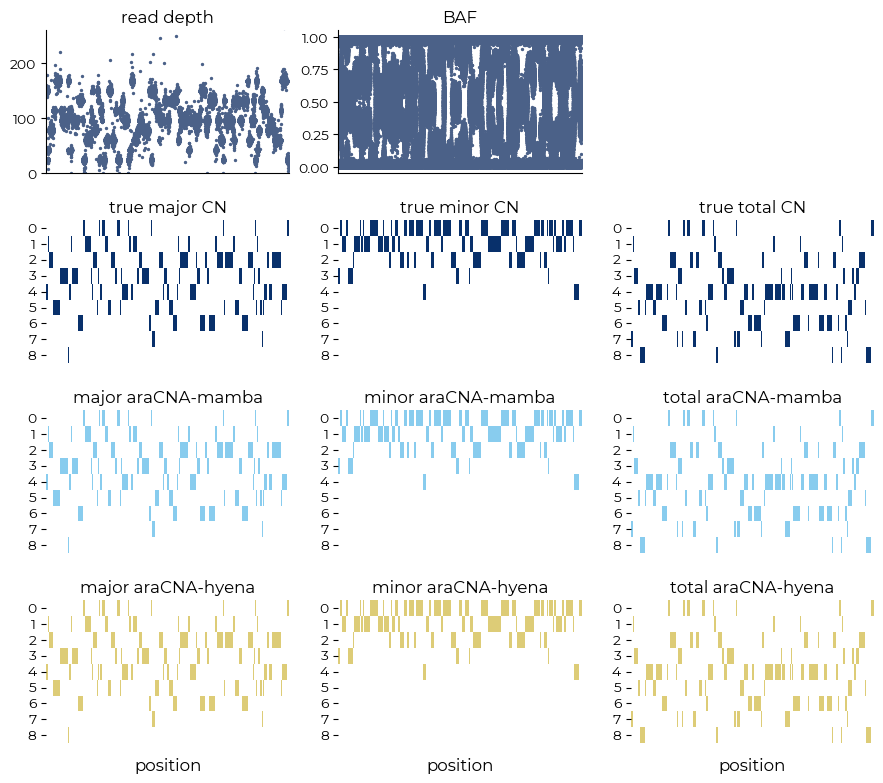

In [59]:
from aracna.src.analysis.plot_comparison import get_plot_from_val_list

get_plot_from_val_list(total, val_list, titles, model_keys, read_ylim=260, colors=colors, window_size=None, max_vals=[8, 8, 8], prob_scale=1.2, include_chrom=False, include_prob=False)
plt.savefig(f'data/figures/{figure_prefix}sim_ill_eg.png', dpi=300)

In [173]:
from aracna.src.analysis.comparison_other_tools import get_baf_rmse, get_recon

rd_dict = {}
baf_dict = {}
for i, global_df in enumerate(global_df_ls):
    val_arr = total[[f'major_smoothed_window_opt_500_{model_keys[i]}', f'minor_smoothed_window_opt_500_{model_keys[i]}']].values

    rd_recon = get_recon(global_df["read_depth"].item(),
                global_df["purity"].item(),
                val_arr)

    baf_recon = get_baf_rmse(total["BAF"].values, global_df["purity"].item(), val_arr, mean=False, return_recon=True)
    _model_str = model_dict[model_keys[i]]
    rd_dict[_model_str] = rd_recon
    baf_dict[_model_str] = baf_recon

result = {"RD": rd_dict, "BAF": baf_dict}

tot_df = pd.concat({k: pd.DataFrame(v) for k, v in result.items()}, axis=0)
tot_df=tot_df.reset_index(level=0).rename(columns={'level_0': 'metric_name'})

tot_df_pivot = tot_df.pivot_table(index=tot_df.index, columns='metric_name')

# Flatten the columns and add the prefix from 'metric_name'
tot_df_pivot.columns = [f'{metric}_{col}' for metric, col in tot_df_pivot.columns]

keep_cols = ['chr', 'position', 'read_depth', 'BAF']
for c in keep_cols:
    tot_df_pivot[c] = total[c]


$araCNA_dir/notebook_analyses/plotting_functions.py:416: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(new_labels)
$araCNA_dir/notebook_analyses/plotting_functions.py:416: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(new_labels)


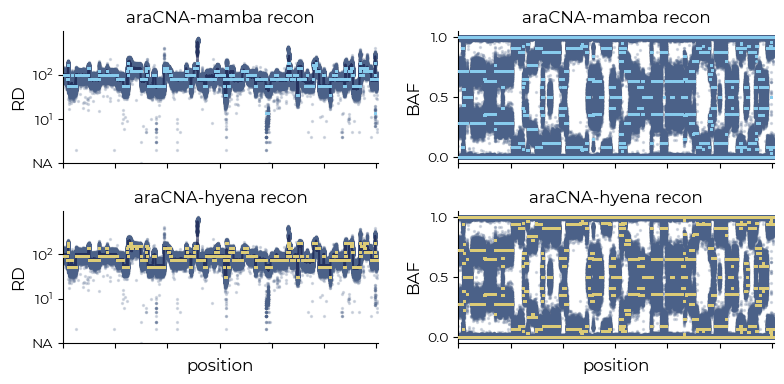

In [275]:
from notebook_analyses.plotting_functions import plot_recon

plot_recon(tot_df_pivot.head(630000), prefixes=["araCNA-mamba", 'araCNA-hyena'], palette=[mamba_c, hyena_c], include_pos=False)
plt.savefig(f'data/figures/{figure_prefix}recon_ill_eg.png', dpi=300)
# plot_recon(aracna_df, val_list, titles, read_ylim=260, colors=colors, window_size=None, max_vals=[8, 8, 8], prob_scale=1.2, include_chrom=False, include_prob=False)


### Real results

In [5]:
file_prefix="normal_depth_"
base_dir = "$data_dir/tcga_analysis/output/bams"
cases = [f for f in os.listdir(base_dir) if os.path.isdir(f"{base_dir}/{f}") if os.path.exists(f"{base_dir}/{f}/joined_results/{file_prefix}sequence_{model_str}.csv")]
len(cases)

50

In [68]:
info_df = pd.read_csv("$data_dir/tcga_analysis/input/bams/paired_samples_21_10.txt", sep="\t")[['cases.0.case_id', 'cancer_type']].drop_duplicates().rename(columns = {'cases.0.case_id': "case_id"})

tot_info = pd.concat((info_df, pd.DataFrame([{"case_id": case, "cancer_type": "ovarian"} for case in cases if case not in info_df["case_id"].values])))


In [12]:
global_dfs = {case: pd.read_csv(f"{base_dir}/{case}/joined_results/{file_prefix}globals_{model_str}.csv", index_col=0) for case in cases}

joined_dfs = {case: pd.read_csv(f"{base_dir}/{case}/joined_results/{file_prefix}sequence_{model_str}.csv", index_col=0) for case in cases}


In [6]:

def get_dict(json_file):
    if os.path.exists(json_file):
        with open(json_file) as f:
            return json.load(f)
    else:
        print(json_file)

In [ ]:
from aracna.src.analysis.comparison_other_tools import analyse_results
from aracna.src.analysis.utils import get_infer_info


def filter_out_high_rd(case_id, model_keys, trim_ratio = 0.05):
    joined, glob = joined_dfs[case_id], global_dfs[case_id]
    # lower_val = np.quantile(joined.read_depth, trim_ratio)
    upper_val = np.quantile(joined.read_depth, 1 - trim_ratio)
    mean_mask = (joined.read_depth <= upper_val)
    joined_df, old_glob_df = joined[mean_mask].reset_index(), glob
    glob_df = old_glob_df.copy()

    result_dict = analyse_results(joined_df, glob_df, model_keys, include_plot=False)

    out_json_file=f"{base_dir}/{case_id}/joined_results/summary_stats_{model_str}_lowrd.json"
    with open(out_json_file, "w") as json_file:
        json.dump(result_dict, json_file)

    return joined_df, glob_df, result_dict




# investigating diff when excluding top 5%

existing_rd_filter = {case: [None, None, val] for case in cases if (val:=get_dict(f"{base_dir}/{case}/joined_results/summary_stats_{model_str}_lowrd.json")) is not None}
get_other_rd_filter = {case_id: filter_out_high_rd(case_id, model_keys, 0.05) for case_id in cases if case_id not in existing_rd_filter}
low_rd_results_dict = get_other_rd_filter | existing_rd_filter
# summary_res = {case: low_rd_results_dict[case][-1] for case in cases}





In [80]:


def get_file(case, suffix=''):
    return f"{base_dir}/{case}/joined_results/{file_prefix}summary_stats_{model_str}{suffix}.json"


summary_res = {case: get_dict(get_file(case)) for case in cases}

In [81]:
df = pd.json_normalize(summary_res, sep=".").melt(var_name='metric_path', value_name='metric_val')


In [82]:
df = pd.json_normalize(summary_res, sep=".").melt(var_name='metric_path', value_name='metric_val')
df['metric_path_split'] = df['metric_path'].str.split('.')
df[['case', 'metric_name', 'model_1', 'other_model', 'category']] = df['metric_path'].str.split('.', expand=True)
df = df[['case', 'model_1', 'other_model', 'category', 'metric_name', 'metric_val']]

In [22]:
df["model_1"].unique()

array(['ascat', 'battenberg', 'cnv_both', 'cnv_both_purity_ascat',
       'aracna_pjflljt4_', 'aracna_pjflljt4_win_opt_250',
       'aracna_pjflljt4_win_opt_500', 'aracna_qwsvrrgk_',
       'aracna_qwsvrrgk_win_opt_250', 'aracna_qwsvrrgk_win_opt_500',
       'battenberg_approx', 'hmm_copy', 'cnv_tot',
       'hmm_copy_purity_ascat', 'cnv_tot_purity_ascat', 'aracna_pjflljt4',
       'aracna_qwsvrrgk', 'cnv_kit'], dtype=object)

In [ ]:
cnv_kit_model = "CNVkit*"

keep_aracna = [f"aracna_{model_key}_{aracna_mod}" for model_key in model_keys]
aracna_remap = {f"aracna_{model_key}_{aracna_mod}": model_dict[model_key] for model_key in model_keys}

keep_models = keep_aracna + ["battenberg", "battenberg_approx", "hmm_copy", "ascat", "cnv_both", "cnv_both_purity_ascat"]
sub_df = df[df.model_1.isin(keep_models) & df.other_model.isin(keep_models + [None])]

sub_df.replace(aracna_remap | {"hmm_copy": "HMM copy", "cnv_both": "CNVkit", "cnv_both_purity_ascat": cnv_kit_model}, inplace=True)

sub_df.loc[(sub_df.model_1 == "battenberg") & (sub_df.metric_name.isin(["BAF_RMSE", "RD_MAE"]) ), "model_1"] = "battenberg\nmulti-clone"

sub_df.loc[(sub_df.model_1 == "battenberg_approx") & (sub_df.metric_name.isin(["BAF_RMSE", "RD_MAE"]) ), "model_1"] = "battenberg"

renamed_models = ["HMM copy", "ascat", "battenberg", "battenberg\nmulti-clone", cnv_kit_model, "araCNA-mamba", "araCNA-hyena"]
plot_palette = [hmm_copy_c, ascat_c, battenberg_c, battenberg_c,  cnv_c, mamba_c, hyena_c]



In [ ]:
from collections import defaultdict

from aracna.src.analysis.comparison_other_tools import get_val_dict

get_agg_top_tot = defaultdict(list)

models = ["ascat", "battenberg", "hmm_copy", "cnv_both", "cnv_both_purity_ascat"] + keep_aracna

tot_df_ls = []
for case in cases:
    joined_df = joined_dfs[case]
    val_dict = get_val_dict(joined_df)
    tot_df = pd.DataFrame({key: val.sum(axis=-1) if key!= "hmm_copy" else val for key, val in val_dict.items()})

    for model in models:
        sub_vals = tot_df[[model]].dropna()
        top_5_percent = sub_vals[sub_vals[model] > sub_vals[model].quantile(0.95)]
        top_5_percent['model_1'] = model
        top_5_percent = top_5_percent.rename(columns={model: "metric_val"})
        top_5_percent['metric_name'] = "top_5_percent"
        get_agg_top_tot[model].append(top_5_percent)

In [100]:
# agg_dict = {model: pd.concat(val).reset_index(drop=True) for model, val in get_agg_top_tot.items()}
agg_df = pd.concat([pd.concat(val).reset_index(drop=True) for val in get_agg_top_tot.values()])
# agg_df = agg_df.rename(columns={'index': 'case'})
agg_df.replace(aracna_remap | {"hmm_copy": "HMM copy", "cnv_both": "CNVkit", "cnv_both_purity_ascat": cnv_kit_model}, inplace=True)

agg_df.head()

# plot_df = pd.concat([plot_df, agg_df])

,metric_val,model_1,metric_name
0,10.0,ascat,top_5_percent
1,10.0,ascat,top_5_percent
2,10.0,ascat,top_5_percent
3,10.0,ascat,top_5_percent
4,10.0,ascat,top_5_percent


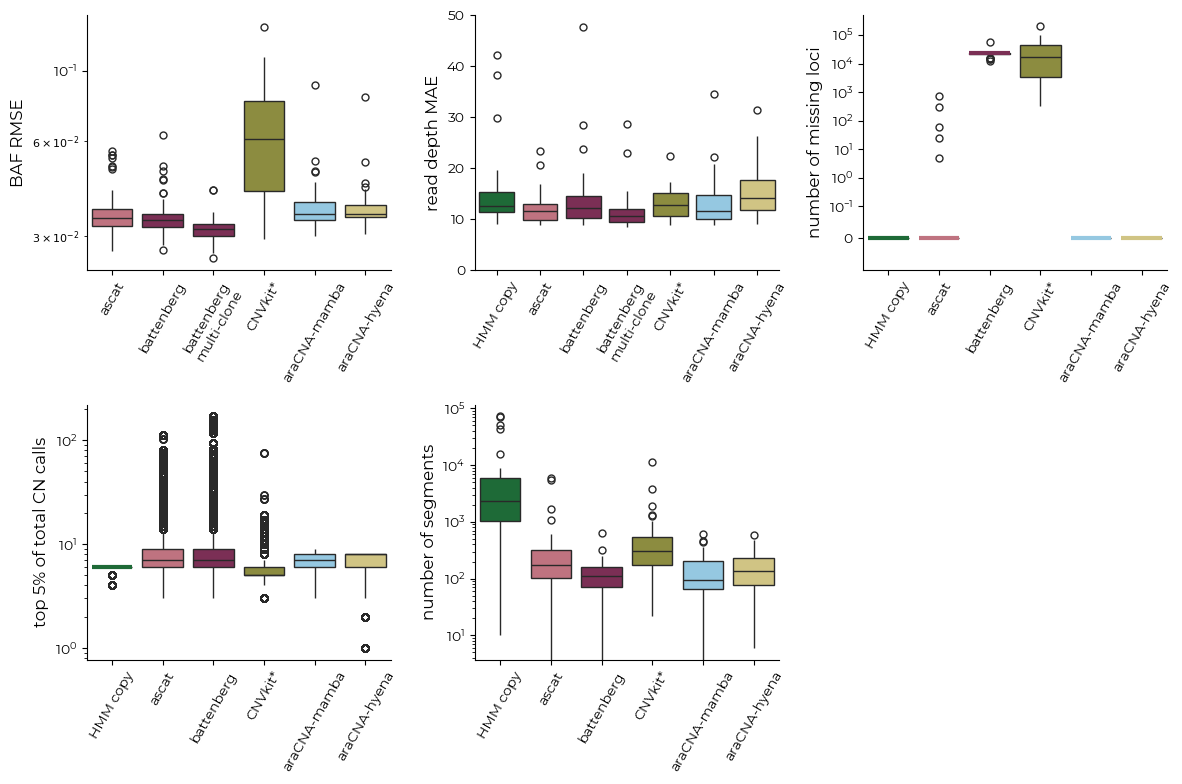

In [131]:
import seaborn as sns
from matplotlib.ticker import FixedFormatter, FixedLocator, LogLocator

plot_df = sub_df[sub_df.metric_name.isin(['BAF_RMSE', 'RD_MAE', "num_break_points", "num_na"])]
plot_df = pd.concat([plot_df, agg_df]).reset_index(drop=True)
plot_df['metric_name'] = pd.Categorical(plot_df['metric_name'], categories=['BAF_RMSE', 'RD_MAE', "num_na", "top_5_percent", "num_break_points"], ordered=True)
plot_df = plot_df[plot_df.model_1.isin(renamed_models)]
plot_df['model_cat'] = pd.Categorical(plot_df['model_1'], categories=renamed_models, ordered=True)


# Sort by category
plot_df = plot_df.sort_values('model_cat')


@apply_montserrat
def get_recon_plot(plot_df):
    g = sns.catplot(plot_df, x="model_1", y="metric_val", col="metric_name", sharey=False, kind='box', hue='model_1', palette=plot_palette, hue_order=renamed_models, showcaps=False, sharex=False, col_wrap=3, height=4)
    # g.set(ylim=(0, 2000))
    # g.axes.flat[0].set_ylim(0.02, 0.1)  #
    g.axes.flat[1].set_ylim(0, 50)  #
    # g.axes.flat[2].set_ylim(0, 5000)  #\
    g.set_titles("")
    g.set_xlabels("")
    g.axes.flat[0].set_ylabel("BAF RMSE")

    g.axes.flat[1].set_ylabel("read depth MAE")

    g.axes.flat[2].set_ylabel("number of missing loci")
    g.axes.flat[2].set_yscale("symlog", linthresh=1e-1)
    g.axes.flat[2].set_ylim(-0.1, 5e5)
    g.axes.flat[3].set_ylabel("top 5% of total CN calls")
    g.axes.flat[3].set_yscale("log")

    g.axes.flat[4].set_ylabel("number of segments")
    g.axes.flat[4].set_yscale("log")
    # g.axes.flat[4].set_ylim(0, 180)
    # Adding more minor ticks on the y-axis

    ax = g.axes.flat[0]
    ax.set_yscale("log")
    ax.yaxis.set_major_locator(LogLocator(base=10.0))  # Major ticks at 10^0, 10^1, etc.
    # Adding specific minor ticks at 0.03, 0.05, 0.07
    minor_ticks = [0.03, 0.06, 0.15]
    ax.yaxis.set_minor_locator(FixedLocator(minor_ticks))
    # ax.set_ylim(0, 0.15)
    def scientific_label(tick):
        exponent = int(np.floor(np.log10(tick)))  # Determine the exponent based on the tick value
        coefficient = tick / (10**exponent)       # Calculate the coefficient (significant figure)
        return rf"${coefficient:.0f} \times 10^{{{exponent}}}$"

    minor_labels = [scientific_label(tick) for tick in minor_ticks]
    ax.yaxis.set_minor_formatter(FixedFormatter(minor_labels))

    plt.setp(ax.get_yminorticklabels(), fontsize=8, fontfamily='Montserrat')  # Sets font properties

    box = g.axes.flat[2]
    # Iterate through each median line and set the color based on the hue
    for i, container in enumerate(box.containers):
        if i==3:
            continue
        hue_color = container.boxes[0].get_facecolor() # Get the facecolor of the current box which corresponds to hue
        container.medians[0].set_color(hue_color)  # Median line index in each boxplot group
        container.medians[0].set_linewidth(3)  # Adjust thickness as desired
    box = g.axes.flat[3]
    # Iterate through each median line and set the color based on the hue
    for i, container in enumerate(box.containers):
        if i==0:
            hue_color = container.boxes[0].get_facecolor() # Get the facecolor of the current box which corresponds to hue
            container.medians[0].set_color(hue_color)  # Median line index in each boxplot group
            container.medians[0].set_linewidth(3)  # Adjust thickness as desired


    g.set_xticklabels(rotation=60)
    # g.set_xticklabels(labels=renamed_models, rotation=45)
    # g.fig.subplots_adjust(hspace=0.1)  # Set this to zero or a small value
    plt.tight_layout()
    plt.savefig(f"data/figures/{figure_prefix}real_recon_summary.png", dpi=300)

get_recon_plot(plot_df)


/tmp/slurm-19515044/ipykernel_2695095/2501687575.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_minor_formatter(FixedFormatter(minor_labels))


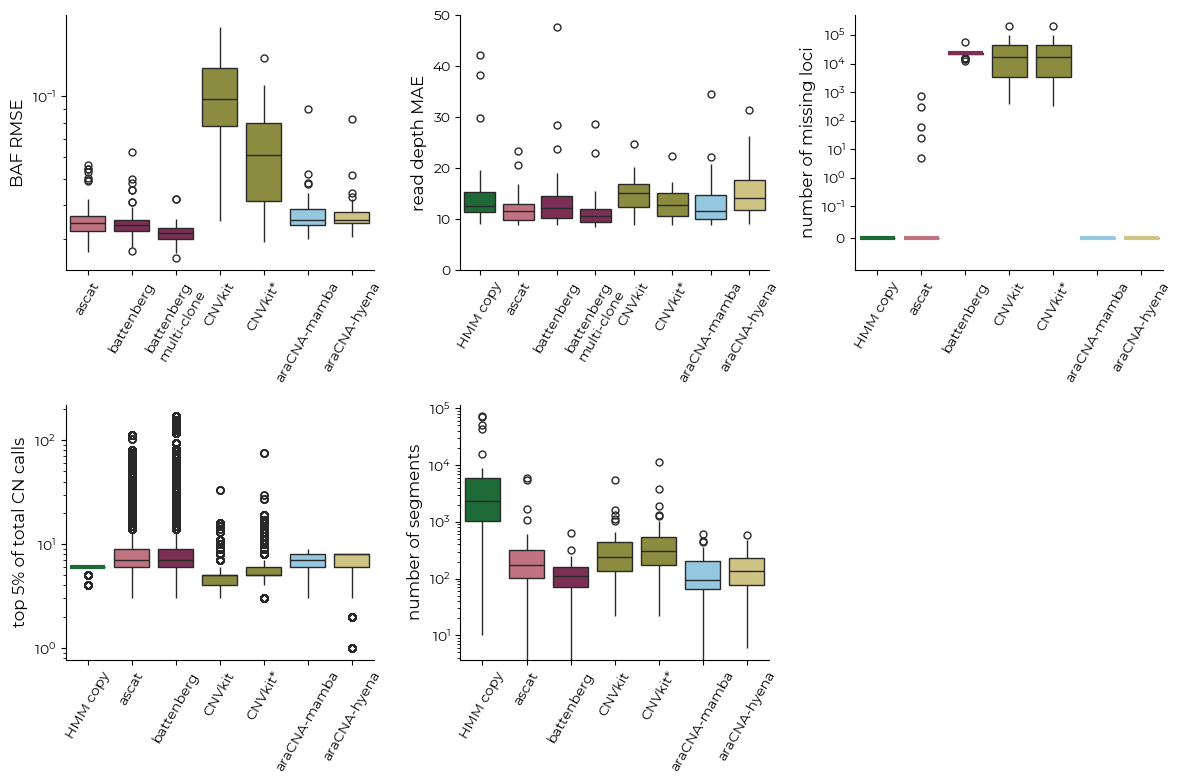

In [122]:
import seaborn as sns

renamed_models_extra = ["HMM copy", "ascat", "battenberg", "battenberg\nmulti-clone", "CNVkit", cnv_kit_model, "araCNA-mamba", "araCNA-hyena"]
plot_palette_extra = [hmm_copy_c, ascat_c, battenberg_c, battenberg_c,  cnv_c, cnv_c,  mamba_c, hyena_c]

plot_df = sub_df[sub_df.metric_name.isin(['BAF_RMSE', 'RD_MAE', "num_break_points", "num_na"])]
plot_df = pd.concat([plot_df, agg_df]).reset_index(drop=True)
plot_df['metric_name'] = pd.Categorical(plot_df['metric_name'], categories=['BAF_RMSE', 'RD_MAE', "num_na", "top_5_percent", "num_break_points"], ordered=True)
plot_df['model_cat'] = pd.Categorical(plot_df['model_1'], categories=renamed_models_extra, ordered=True)

# Sort by category
plot_df = plot_df.sort_values('model_cat')
g = sns.catplot(plot_df, x="model_1", y="metric_val", col="metric_name", sharey=False, kind='box', hue='model_1', palette=plot_palette_extra, hue_order=renamed_models_extra, showcaps=False, sharex=False, col_wrap=3, height=4)
# g.set(ylim=(0, 2000))
# g.axes.flat[0].set_ylim(0.02, 0.1)  #
g.axes.flat[1].set_ylim(0, 50)  #
# g.axes.flat[2].set_ylim(0, 5000)  #\
g.set_titles("")
g.set_xlabels("")
g.axes.flat[0].set_ylabel("BAF RMSE")

g.axes.flat[1].set_ylabel("read depth MAE")

g.axes.flat[2].set_ylabel("number of missing loci")
g.axes.flat[2].set_yscale("symlog", linthresh=1e-1)
g.axes.flat[2].set_ylim(-0.1, 5e5)
g.axes.flat[3].set_ylabel("top 5% of total CN calls")
g.axes.flat[3].set_yscale("log")

g.axes.flat[4].set_ylabel("number of segments")
g.axes.flat[4].set_yscale("log")
# g.axes.flat[4].set_ylim(0, 180)
# Adding more minor ticks on the y-axis

ax = g.axes.flat[0]
ax.set_yscale("log")
ax.yaxis.set_major_locator(LogLocator(base=10.0))  # Major ticks at 10^0, 10^1, etc.
# Adding specific minor ticks at 0.03, 0.05, 0.07
minor_ticks = [0.03, 0.06, 0.15]
ax.yaxis.set_minor_locator(FixedLocator(minor_ticks))

# ax.set_ylim(0, 0.15)
def scientific_label(tick):
    exponent = int(np.floor(np.log10(tick)))  # Determine the exponent based on the tick value
    coefficient = tick / (10**exponent)       # Calculate the coefficient (significant figure)
    return rf"${coefficient:.0f} \times 10^{{{exponent}}}$"

minor_labels = [scientific_label(tick) for tick in minor_ticks]
ax.yaxis.set_minor_formatter(FixedFormatter(minor_labels))
for label in ax.get_yminorticklabels():
    label.set_fontsize(10)  # Change font size
    label.set_fontfamily('Montserrat')  # Change font family


box = g.axes.flat[2]
# Iterate through each median line and set the color based on the hue
for i, container in enumerate(box.containers):
    if i==3 or i==4:
        continue
    hue_color = container.boxes[0].get_facecolor() # Get the facecolor of the current box which corresponds to hue
    container.medians[0].set_color(hue_color)  # Median line index in each boxplot group
    container.medians[0].set_linewidth(3)  # Adjust thickness as desired
box = g.axes.flat[3]
# Iterate through each median line and set the color based on the hue
for i, container in enumerate(box.containers):
    if i==0:
        hue_color = container.boxes[0].get_facecolor() # Get the facecolor of the current box which corresponds to hue
        container.medians[0].set_color(hue_color)  # Median line index in each boxplot group
        container.medians[0].set_linewidth(3)  # Adjust thickness as desired


g.set_xticklabels(rotation=60)
# g.set_xticklabels(labels=renamed_models, rotation=45)
# g.fig.subplots_adjust(hspace=0.1)  # Set this to zero or a small value
plt.tight_layout()
plt.savefig(f"data/figures/{figure_prefix}real_recon_summary_2cnv.png", dpi=300)


In [103]:

conc_df = sub_df[(sub_df.model_1.isin(renamed_models)) & (sub_df.other_model.isin(renamed_models)) ]
conc_df = conc_df[(conc_df.other_model != "HMM copy") & (~conc_df.model_1.str.contains("araCNA"))]
conc_df = conc_df[~((conc_df.model_1 == "battenberg") & (conc_df.other_model == "ascat"))]
conc_df = conc_df[((conc_df.model_1 == cnv_kit_model) & (conc_df.other_model.str.contains("araCNA")))| (conc_df.model_1 != cnv_kit_model)]

/tmp/slurm-19515044/ipykernel_2695095/2489791518.py:10: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  g = sns.catplot(conc_df[conc_df.metric_name.isin(['concordance', 'rmse'])], x="combo", y="metric_val", row="metric_name", hue="category", kind='box', sharey=False, palette=ibm_palette, hue_order=['major', 'minor', 'both', 'total'],  height=3, aspect=2, showcaps=False, showfliers=False)


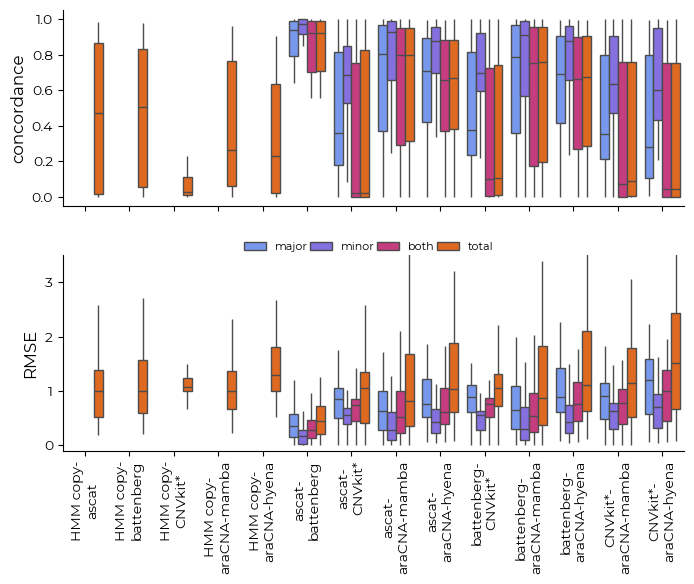

In [132]:
import matplotlib.pyplot as plt

conc_df['model_cat'] = pd.Categorical(conc_df['model_1'], categories=renamed_models, ordered=True)
conc_df['model_cat_2'] = pd.Categorical(conc_df['other_model'], categories=renamed_models, ordered=True)

# Sort by category
conc_df = conc_df.sort_values(['metric_name','model_cat', 'model_cat_2'])
conc_df['combo'] = conc_df['model_1'] + "-\n" + conc_df['other_model']
g = sns.catplot(conc_df[conc_df.metric_name.isin(['concordance', 'rmse'])], x="combo", y="metric_val", row="metric_name", hue="category", kind='box', sharey=False, palette=ibm_palette, hue_order=['major', 'minor', 'both', 'total'],  height=3, aspect=2, showcaps=False, showfliers=False)

# for i, ax in enumerate(g.axes.flat):
#     val = 'concordance' if i == 0 else 'rmse'
#     sns.stripplot(data=conc_df[conc_df.metric_name == val],
#                   x="combo", y="metric_val", hue="category",
#                   dodge=True, jitter=True, alpha=1, ax=ax, palette=ibm_palette,
#                   hue_order=['major', 'minor', 'both', 'total'], legend=False, size=3, edgecolor='black', linewidth=0.1)

g.tick_params(axis='x', rotation=90)
g.set_titles("")
g.set_xlabels("")
g.axes.flat[0].set_ylabel("concordance")
g.axes.flat[1].set_ylabel("RMSE")

# IF VERTICAL
sns.move_legend(g, loc='upper center', bbox_to_anchor=(0.53, 0.6), ncol=4, title='', fontsize=8, columnspacing=0.2)
plt.tight_layout()
plt.subplots_adjust(hspace=0.25)

# g.axes.flat[0].set_ylim(0, 1)
g.axes.flat[1].set_ylim(-0.1, 3.5)
plt.savefig(f"data/figures/{figure_prefix}real_conc.png", dpi=300)



In [105]:
ploidy_purity_df = df[df.metric_name.isin(["purity", "ploidy"])]
for model_key in model_keys:
    ploidy_purity_df.loc[(ploidy_purity_df.model_1 == f"aracna_{model_key}") & (ploidy_purity_df.metric_name == "purity"), "model_1"] = f"aracna_{model_key}_{aracna_mod}"



In [90]:
ploidy_purity_df.model_1.unique()

array(['ascat', 'battenberg', 'aracna_pjflljt4_win_opt_500',
       'aracna_qwsvrrgk_win_opt_500', 'hmm_copy', 'cnv_kit',
       'cnv_kit_purity_ascat', 'aracna_pjflljt4_',
       'aracna_pjflljt4_win_opt_250', 'aracna_qwsvrrgk_',
       'aracna_qwsvrrgk_win_opt_250'], dtype=object)

In [106]:
inter_df = ploidy_purity_df.pivot_table(index=["case", "metric_name"], columns="model_1", values="metric_val")
purity_plot = inter_df.reset_index().melt(id_vars=['case', 'metric_name', 'ascat'], value_vars=['battenberg', 'hmm_copy', 'cnv_kit_purity_ascat'] + keep_aracna, value_name='metric_val')
purity_plot.replace(aracna_remap | {"hmm_copy": "HMM copy", "cnv_kit_purity_ascat": cnv_kit_model}, inplace=True)



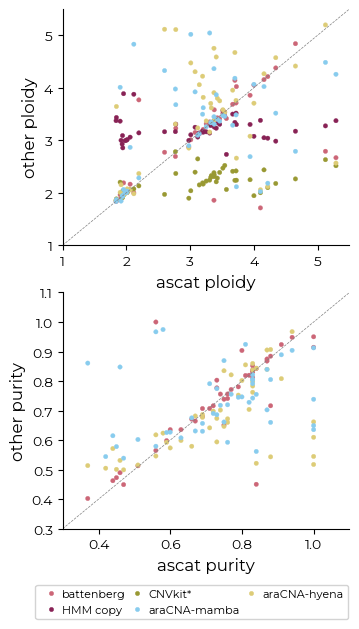

In [107]:
g = sns.FacetGrid(purity_plot, row="metric_name", sharey=False, sharex=False, height=3, aspect=0.6)
g.map_dataframe(sns.scatterplot, x="ascat", y="metric_val", hue="model_1", palette=model_palette[1:], s=10, hue_order=["battenberg", "HMM copy", cnv_kit_model, "araCNA-mamba", "araCNA-hyena"], edgecolor=None)
g.add_legend()
# g.set_axis_labels("ascat", "other model")

g.set_titles("")
# IF VERTICAL
sns.move_legend(g, loc='upper center', bbox_to_anchor=(0.53, 0.02), ncol=3, title='', fontsize=8, columnspacing=0.005, handletextpad=0.01, frameon=True, edgecolor="lightgray", framealpha=1, facecolor="white")
# Get the legend object
# sns.move_legend(g, loc='upper center', bbox_to_anchor=(0.51, 1.02), ncol=4, title='', fontsize=8, columnspacing=0.01, handletextpad=0.01,
# )

g.axes.flat[0].set_xlabel("ascat ploidy")
g.axes.flat[0].set_ylabel("other ploidy")

g.axes.flat[1].set_xlabel("ascat purity")
g.axes.flat[1].set_ylabel("other purity")

g.axes.flat[0].set_xlim(1, 5.5)  # Set x-axis limit
g.axes.flat[0].set_ylim(1, 5.5)  # Set y-axis limit

g.axes.flat[1].set_xlim(0.3, 1.1)  # Set x-axis limit
g.axes.flat[1].set_ylim(0.3, 1.1)  # Set y-axis limit

# Function to add y=x line to each facet
def add_identity_line(*args, **kwargs):
    ax = plt.gca()  # Get current axis
    limits = [min(ax.get_xlim()[0], ax.get_ylim()[0]),
              max(ax.get_xlim()[1], ax.get_ylim()[1])]
    ax.plot(limits, limits, '--', color='gray', linewidth=0.5)
    ax.set_xlim(limits)
    ax.set_ylim(limits)

# Apply the function to each facet
g.map(add_identity_line)
plt.tight_layout()
g.fig.subplots_adjust(hspace=0.2)  # Adjust this value to increase/decrease spacing
plt.savefig(f"data/figures/{figure_prefix}real_purity.png", dpi=300, bbox_inches='tight')


In [110]:
from aracna.src.analysis.plot_comparison import get_plot_from_val_list

val_list = [["hmm_state"],
        ["ascat_nMajor", "ascat_nMinor"],
        ["bat_nMaj1_A", "bat_nMin1_A"],
        ["cnvkit_pa_cn1", "cnvkit_pa_cn2"],
        [f'{reverse_dict["araCNA-mamba"]}_major_smoothed_window_opt_500', f'{reverse_dict["araCNA-mamba"]}_minor_smoothed_window_opt_500'],
        [f'{reverse_dict["araCNA-hyena"]}_major_smoothed_window_opt_500', f'{reverse_dict["araCNA-hyena"]}_minor_smoothed_window_opt_500']
    ]

titles = (
    ["read depth", "BAF", "total HMM copy"]
    + ["major ascat", "minor ascat", "total ascat"]
    + ["major battenberg", "minor battenberg", "total battenberg"]
    + [f"major {cnv_kit_model}", f"minor {cnv_kit_model}", f"total {cnv_kit_model}"]
    + ["major araCNA-mamba", "minor araCNA-mamba", "total araCNA-mamba"]
    + ["major araCNA-hyena", "minor araCNA-hyena", "total araCNA-hyena"]    # + ["major araCNA (smoothed)", "minor araCNA (smoothed)", "total araCNA (smoothed)"]
    # + ["major araCNA probs", "minor araCNA probs", "total araCNA probs"]
)

colors = [
    hmm_copy_c,
    ascat_c,
    battenberg_c,
    cnv_c,
    mamba_c,
    hyena_c
    # aracna_c,
    # aracna_c,
]

In [ ]:
filtered_df= df[(df.model_1.str.contains(aracna_mod)) & (df.metric_name=="concordance") & (df.category == "total")]
filtered_df = filtered_df[~filtered_df.other_model.str.contains('aracna')]
idx_max = filtered_df.groupby(["case"])['metric_val'].idxmax()
highest_aracna_concord = filtered_df.loc[idx_max].set_index('case')

highest_aracna_concord

$araCNA_dir/analysis/plot_comparison.py:61: UserWarning: Some of ['bat_nMaj1_A', 'bat_nMin1_A'] have missing/not-a-number values, will include NA category
  warnings.warn(
$araCNA_dir/analysis/plot_comparison.py:61: UserWarning: Some of ['cnvkit_pa_cn1', 'cnvkit_pa_cn2'] have missing/not-a-number values, will include NA category
  warnings.warn(


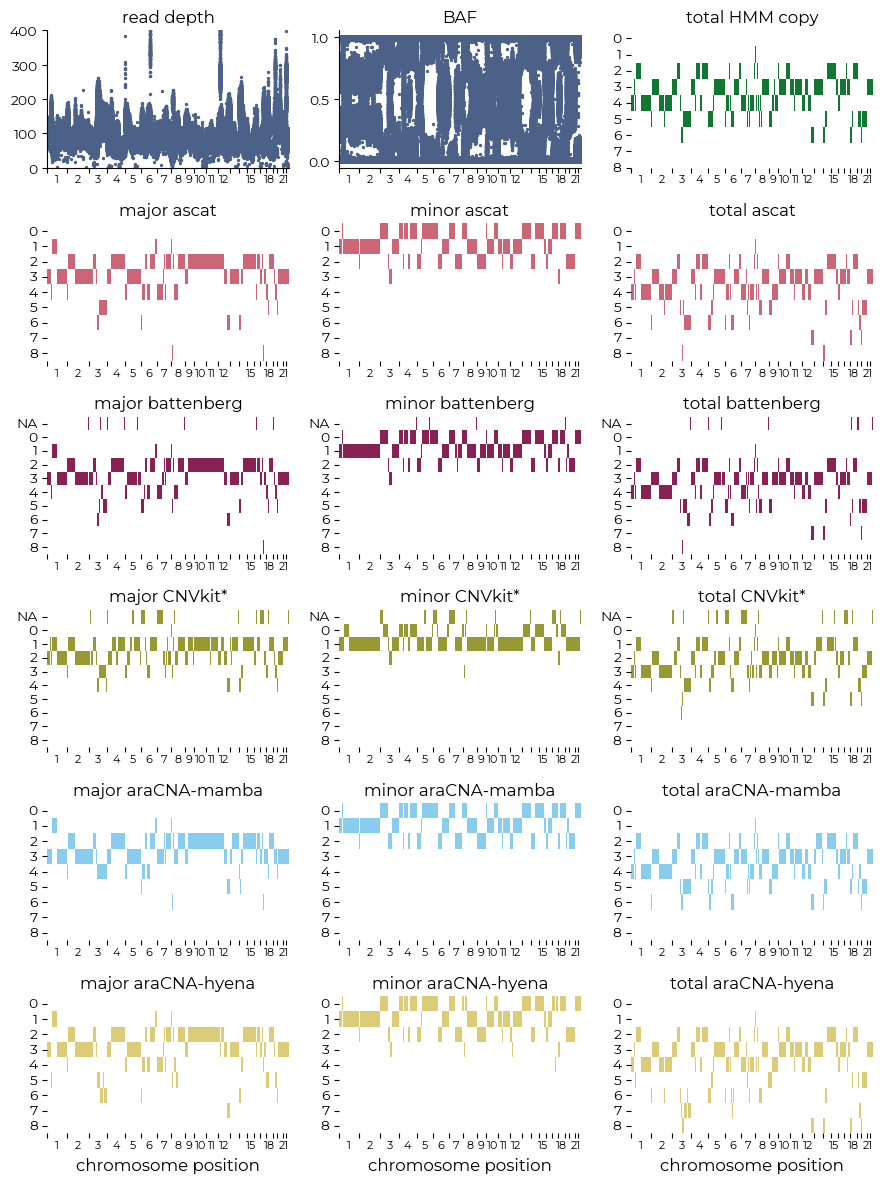

In [111]:
from aracna.src.analysis.plot_comparison import get_plot_from_val_list
case = "" # insert case no here
joined_df = joined_dfs[case].reset_index()
get_plot_from_val_list(joined_df, val_list, titles, model_keys=model_keys, read_ylim=400, colors=colors, window_size=None, max_vals=[8, 8, 8, 8, 8, 8], prob_scale=1.2, include_prob=False, save_file=f"data/figures/{figure_prefix}real_ill_eg_cns.png")

$araCNA_dir/analysis/comparison_other_tools.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bat_vals[extra_cs] = bat_vals[extra_cs].fillna(0)
$araCNA_dir/notebook_analyses/plotting_functions.py:416: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(new_labels)
$araCNA_dir/notebook_analyses/plotting_functions.py:416: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(new_labels)
$araCNA_dir/notebook_analyses/plotting_functions.py:416: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a F

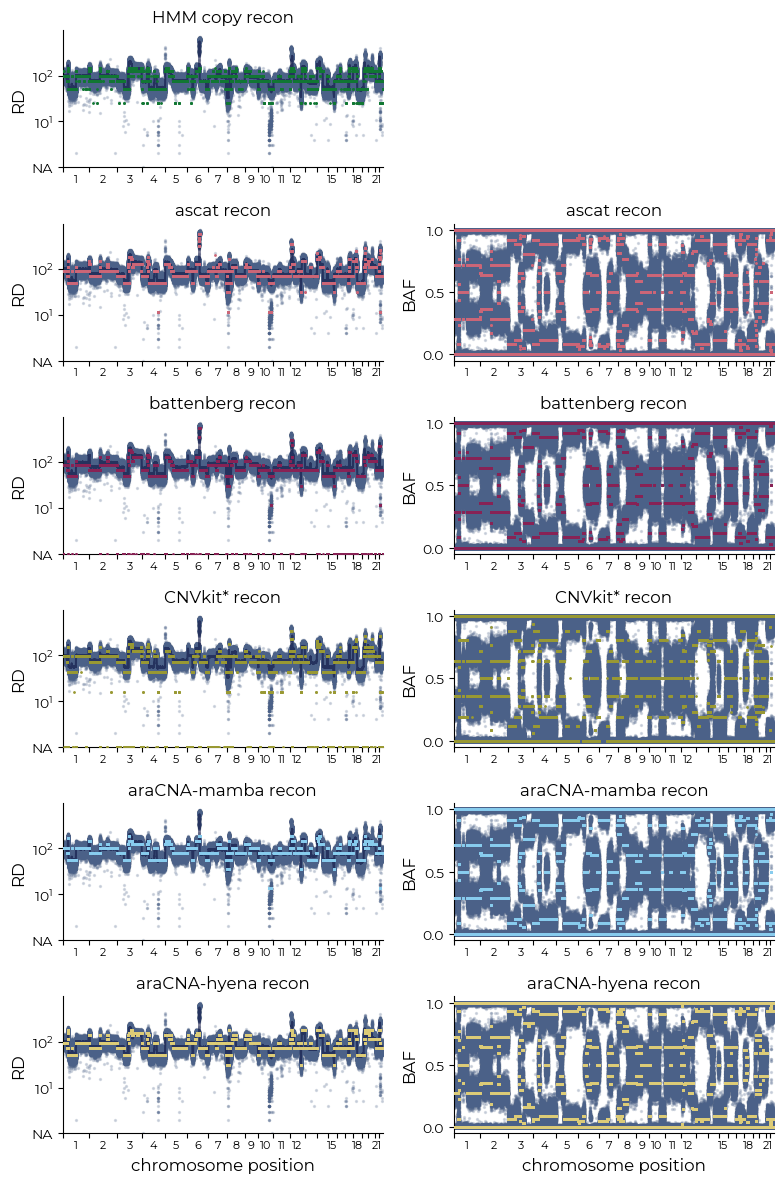

In [108]:
import matplotlib.pyplot as plt
from aracna.src.analysis.plot_comparison import apply_montserrat

from notebook_analyses.plotting_functions import plot_recon
from notebook_analyses.plotting_utils import get_recon_df

recon_colors = [
    hmm_copy_c,
    ascat_c,
    battenberg_c,
    # battenberg_c,
    cnv_c,
    mamba_c,
    hyena_c
    # aracna_c,
    # aracna_c,
]

tot_df_pivot = get_recon_df(joined_dfs[case], global_dfs[case], aracna_remap)
# "battenberg multi-clone"
# "battenberg",
hmm_copy_renamed = ["HMM copy", "ascat", "battenberg", cnv_kit_model, "araCNA-mamba", "araCNA-hyena"]
plot_recon(tot_df_pivot, prefixes=["hmm_copy", "ascat", "battenberg_approx", "cnv_both_purity_ascat", "araCNA-mamba", "araCNA-hyena"], palette=recon_colors, titles=hmm_copy_renamed)
plt.savefig(f"data/figures/{figure_prefix}real_recon_eg.png")

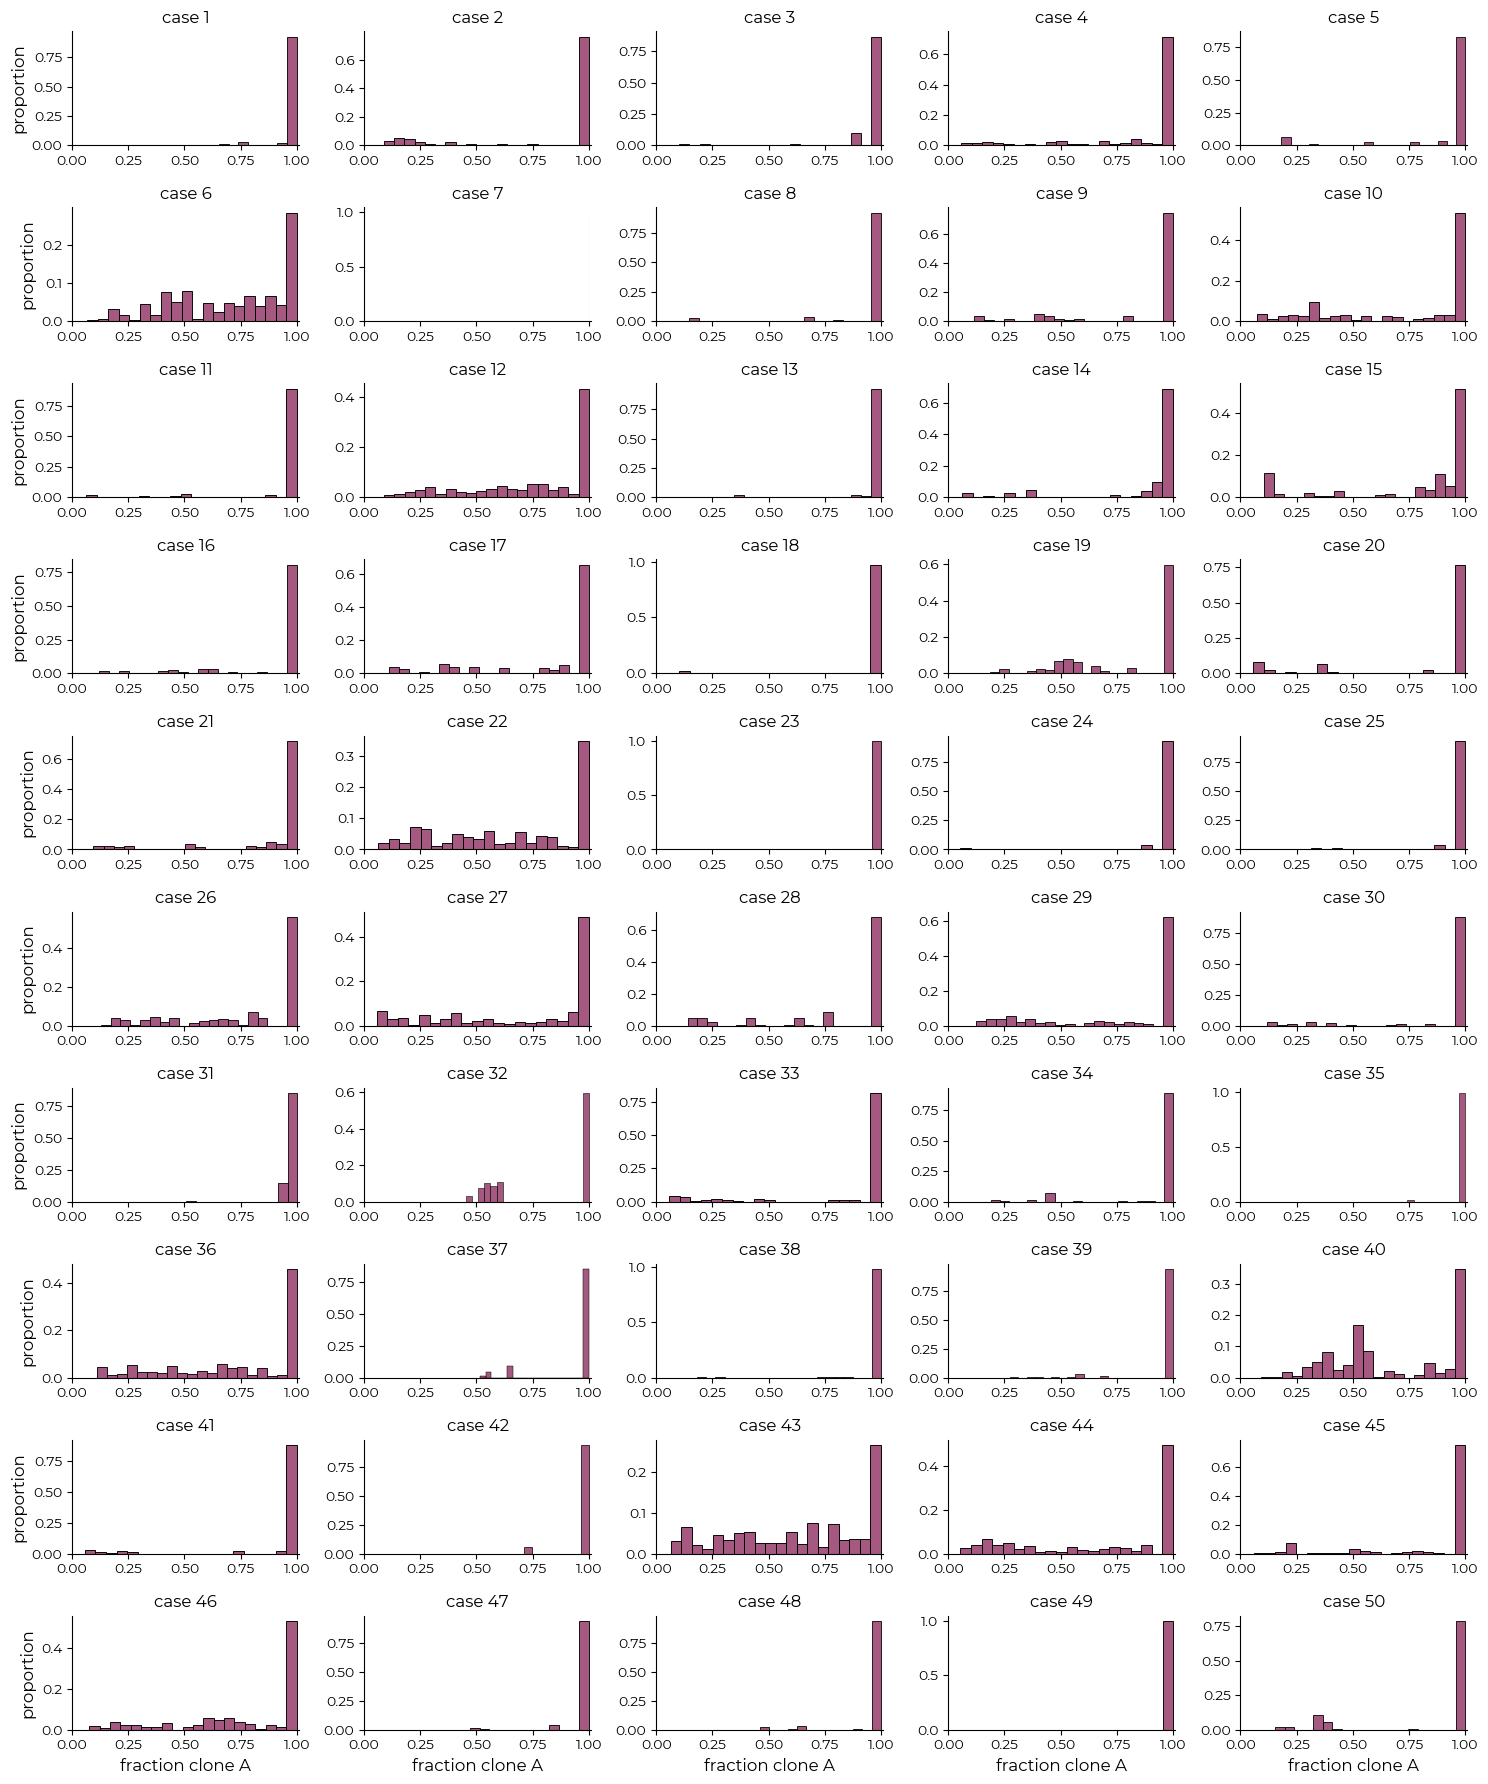

In [125]:

import matplotlib.pyplot as plt
import seaborn as sns

n_row = 10
n_col = 5
fig, axes = plt.subplots(n_row, n_col, figsize=(15, 18))  # Adjust figure size as needed
axes = axes.flatten()  # Flattening to make it easier to index

for i, case in enumerate(cases):
    battenberg_df = joined_dfs[case]
    ax = axes[i]
    ax.set_xlim(0, 1.01)
    sns.histplot(battenberg_df['bat_frac1_A'], bins=20, ax = ax, color=battenberg_c, stat='proportion')
    if i % n_col != 0:
        ax.set_ylabel("")
    else:
        ax.set_ylabel("proportion")
    if i//n_col != n_row - 1:
        ax.set_xlabel("")
    else:
        ax.set_xlabel("fraction clone A")
    ax.set_title(f"case {i + 1}")
    sns.despine(ax=ax, top=True, right=True)

for j in range(i+1, len(axes)):
    axes[j].remove()

fig.tight_layout()
plt.savefig("data/figures/battenberg_frac_A.png", dpi=300)

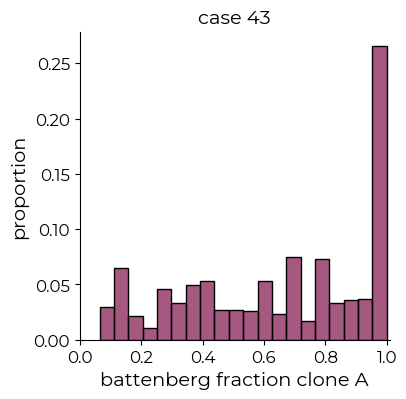

In [133]:
from aracna.src.analysis.plot_comparison import apply_montserrat

plt.figure(figsize=(4,4))
battenberg_df = joined_dfs[cases[42]]
ax = sns.histplot(battenberg_df['bat_frac1_A'], bins=20, color=battenberg_c, stat='proportion')
ax.set_xlim(0, 1.01)
ax.set_xlabel("battenberg fraction clone A",fontsize=14)
ax.set_ylabel("proportion", fontsize=14)
ax.set_title("case 43",fontsize=14)
ax.tick_params(axis='x', labelsize=12)  # Change label size for x-axis
ax.tick_params(axis='y', labelsize=12)  # Change label size for y-axis

sns.despine(ax=ax, top=True, right=True)
plt.savefig("data/figures/battenberg_frac_A_ill_eg.png", dpi=300, bbox_inches='tight')

In [22]:
from aracna.src.analysis.utils import get_datamodule_infer_info

infer_info = get_datamodule_infer_info(model_keys[0], seqlen=650000)
sum(p.numel() for p in infer_info.trained_model.parameters())


Using Normal Backbone


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


12085521

In [23]:
tot = 0
pos_emb_size = 0
num_pos_emb = 0
for name, param in infer_info.trained_model.named_parameters():
    print(name, param.shape)

    if len(param.shape) > 1 and param.shape[1] == 1000000:
        pos_emb_size += torch.prod(torch.tensor(param.shape))
        num_pos_emb += 1
    tot += torch.prod(torch.tensor(param.shape))
print(tot)
print(pos_emb_size)
print(num_pos_emb)

model.embeddings.value_embeddings.0.weight torch.Size([16, 2])
model.embeddings.value_embeddings.0.bias torch.Size([16])
model.embeddings.value_embeddings.2.weight torch.Size([32, 16])
model.embeddings.value_embeddings.2.bias torch.Size([32])
model.embeddings.value_embeddings.4.weight torch.Size([32, 32])
model.embeddings.value_embeddings.4.bias torch.Size([32])
model.embeddings.chromosome_embeddings.weight torch.Size([24, 32])
model.embeddings.token_embeddings.weight torch.Size([24, 32])
model.backbone.layers.0.mixer.in_proj.weight torch.Size([96, 32])
model.backbone.layers.0.mixer.in_proj.bias torch.Size([96])
model.backbone.layers.0.mixer.out_proj.weight torch.Size([32, 32])
model.backbone.layers.0.mixer.out_proj.bias torch.Size([32])
model.backbone.layers.0.mixer.short_filter.weight torch.Size([96, 1, 3])
model.backbone.layers.0.mixer.short_filter.bias torch.Size([96])
model.backbone.layers.0.mixer.filter_fn.bias torch.Size([32])
model.backbone.layers.0.mixer.filter_fn.pos_emb.z to

In [6]:
from aracna.src.analysis.utils import get_datamodule_infer_info

infer_info = get_datamodule_infer_info(model_keys[1], seqlen=650000)
sum(p.numel() for p in infer_info.trained_model.parameters())

Using MambaBackbone


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


65585

In [14]:
import torch

tot = 0
for name, param in infer_info.trained_model.named_parameters():
    print(name, param.shape)
    tot += torch.prod(torch.tensor(param.shape))
print(tot)

model.embeddings.value_embeddings.0.weight torch.Size([16, 2])
model.embeddings.value_embeddings.0.bias torch.Size([16])
model.embeddings.value_embeddings.2.weight torch.Size([32, 16])
model.embeddings.value_embeddings.2.bias torch.Size([32])
model.embeddings.value_embeddings.4.weight torch.Size([32, 32])
model.embeddings.value_embeddings.4.bias torch.Size([32])
model.embeddings.chromosome_embeddings.weight torch.Size([24, 32])
model.embeddings.token_embeddings.weight torch.Size([24, 32])
model.backbone.layers.0.norm.weight torch.Size([32])
model.backbone.layers.0.norm.bias torch.Size([32])
model.backbone.layers.0.mixer.dt_bias torch.Size([8])
model.backbone.layers.0.mixer.A_log torch.Size([8])
model.backbone.layers.0.mixer.D torch.Size([8])
model.backbone.layers.0.mixer.bi_A_log torch.Size([8])
model.backbone.layers.0.mixer.bi_D torch.Size([8])
model.backbone.layers.0.mixer.bi_dt_bias torch.Size([8])
model.backbone.layers.0.mixer.in_proj.weight torch.Size([520, 32])
model.backbone.lay